## Prevendo preços de casas: um exemplo de regressão

Em nossos dois exemplos anteriores, estávamos considerando problemas de classificação, em que o objetivo era prever um único rótulo discreto. Outro tipo comum de problema de aprendizado de máquina é a "regressão", que consiste em prever um valor contínuo em vez de um rótulo discreto. 

Por exemplo, prever a temperatura amanhã a partir de dados meteorológicos, ou prever o tempo de recuperação de um paciente, etc.


---


Para nosso exemplo vamos utilizar o dataset **Boston Housing Price**. O objetivo será prever o preço médio das casas em um barrio de Boston na década de 1970, dadas algumas informações da época, como a taxa de criminalidade, IPTU, etc.

Uma particularidade deste conjunto é que ele tem muito poucos pontos de dados, apenas 506 no total, dividido entre 404 amostras de treinamento e 102 amostras de teste.

Outra particularidade é que a escala dos das features é bem diferente. Por exemplo, alguns valores são proporções, que assumem valores entre 0 e 1, outros assumem valores entre 1 e 12, outros entre 0 e 100, etc.

In [1]:
from keras.datasets import boston_housing
import numpy as np
import pandas as pd


(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)
df = pd.DataFrame(train_data)
df

57344/57026 [==============================] - 0s 3us/step
(404, 13)
(102, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


**Features:**

http://lib.stat.cmu.edu/datasets/boston

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per \$10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
13. LSTAT: %lower status of the population

Rótulo: MEDV: Median value of owner-occupied homes in $1000's

In [2]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

## Preparando os dados

Seria problemático alimentar a rede neural com fetures em escalas totalmente diferentes. A rede pode ser capaz de se adaptar automaticamente a esses dados heterogêneos, mas certamente tornaria o aprendizado mais difícil. 

Uma prática recomendada para lidar com esses dados é fazer a normalização das features: 

* para cada feature (coluna na matriz de dados de entrada), vamos subtrair a média e dividir pelo desvio padrão, causando uma centralização em torno de 0 e terá um desvio padrão de uma unidade.

No sklearn pode ser feito com o método StandarScaler

In [4]:
mean = train_data.mean(axis=0)
print(mean)
train_data -= mean

#adequação em relação à normal dos valores, evita escalas diferentes (0..1, 1..300)
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

[-1.01541438e-16  1.09923072e-17  1.80933376e-15 -7.80453809e-17
 -5.25047552e-15  6.43187374e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.05526149e-16  2.36614908e-14  5.96710525e-15
  6.13920356e-16]


In [5]:
df2 = pd.DataFrame(train_data)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.381973,-0.483615,-0.616568,-0.256833,-0.933487,-0.938177,-0.251223,1.157680,-0.741356,-1.040501,-0.262093,0.448077,0.477421
400,-0.388221,0.358906,-0.609218,-0.256833,-0.796907,-0.038202,-1.888860,0.339660,-0.741356,-1.100681,0.056428,0.448077,-0.848908
401,-0.402030,0.990797,-0.741515,-0.256833,-1.019702,-0.333021,-1.638018,1.430403,-0.971569,-0.613224,-0.717123,0.079439,-0.677769
402,-0.172920,-0.483615,1.245881,-0.256833,2.677335,-0.787241,1.056737,-1.044075,-0.511142,-0.017443,-1.718189,-0.987644,0.420835


Observe que os valores que usamos para normalizar os dados de teste foram calculadas usando os dados de treinamento. 

Nunca devemos usar em nosso fluxo de trabalho qualquer quantidade calculada nos dados de teste, mesmo para algo tão simples como a normalização de dados.

---

## Construindo nossa rede

Como há poucas amostras disponíveis, usaremos uma rede muito pequena com duas camadas ocultas, cada uma com 64 unidades. 

Em geral, quanto menos dados de treinamento você tiver, pior será o overfitting, e usar uma rede pequena é uma forma de mitigar o overfitting.

In [6]:
from keras import models
from keras import layers

def build_model():
    """
        Como precisaremos instanciar o mesmo modelo várias vezes, 
        usamos uma função para construí-lo.
    """

    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', 
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    return model

# https://keras.io/api/metrics/regression_metrics/

Nossa rede termina com uma único neurónio, e nenhuma ativação (ou seja, será uma camada linear). Esta é uma configuração típica para regressão escalar (ou seja, regressão em que tentamos prever um único valor contínuo). 

A aplicação de uma função de ativação restringiria o intervalo que a saída pode assumir; por exemplo, se aplicássemos uma função de ativação sigmóide à nossa última camada, a rede só poderia aprender a prever valores entre 0 e 1. Aqui, como a última camada é puramente linear, a rede é livre para aprender a prever valores em qualquer faixa.


---


Observe que estamos compilando a rede com a função de perda mse - Erro Quadrático Médio, o quadrado da diferença entre as previsões e os alvos, uma função de perda amplamente usada para problemas de regressão.

$\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_{i}-\hat{y}_i)^{2}.$

Também estamos monitorando uma nova métrica durante o treinamento: mae. Isso significa erro médio absoluto. É simplesmente o valor absoluto da diferença entre as previsões e os alvos.

$\mathrm{MAE} = \frac{1}{n} \sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right| = \frac{1}{n} \sum_{i=1}^{n}\left|e_{i}\right|$

---


## Validando usando validação K-fold

Para avaliar nossa rede poderíamos simplesmente dividir os dados em "treino" e "validação", como estávamos fazendo em nossos exemplos anteriores. 

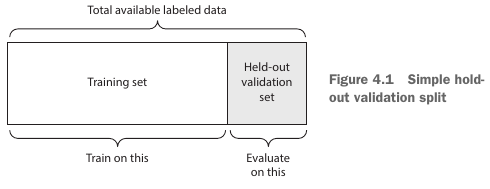

No entanto, como temos tão poucos dados, o conjunto de validação acabaria sendo muito pequeno (por exemplo, 20\% seria somente 80 amostras). 

Uma consequência é que nossas métricas de validação podem mudar muito dependendo de quais amostras escolhemos usar para validação e quais escolhemos para treinamento, ou seja, a mpetrica de validação podem ter uma alta variação em relação à divisão de validação. Isso nos impediria de avaliar de forma confiável nosso modelo.

A melhor prática em tais situações é usar a validação cruzada K-fold. Consiste em dividir os dados disponíveis em K partições, instanciar K modelos idênticos e treinar cada um nas partições K-1 enquanto avalia a partição restante. A métrica de validação para o modelo usado seria então a média nas K iterações.

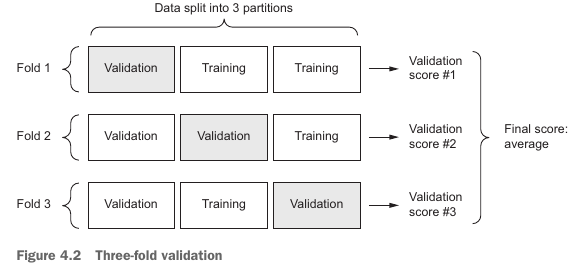

## Validando usando validação K-fold

Para avaliar nossa rede poderíamos simplesmente dividir os dados em "treino" e "validação", como estávamos fazendo em nossos exemplos anteriores. 

No entanto, como temos tão poucos dados, o conjunto de validação acabaria sendo muito pequeno (por exemplo, 20\% seria somente 80 amostras). 

Uma consequência é que nossas métricas de validação podem mudar muito dependendo de quais amostras escolhemos usar para validação e quais escolhemos para treinamento, ou seja, a mpetrica de validação podem ter uma alta variação em relação à divisão de validação. Isso nos impediria de avaliar de forma confiável nosso modelo.

A melhor prática em tais situações é usar a validação cruzada K-fold. Consiste em dividir os dados disponíveis em K partições, instanciar K modelos idênticos e treinar cada um nas partições K-1 enquanto avalia a partição restante. A métrica de validação para o modelo usado seria então a média nas K iterações.

In [7]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()

    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets)

    all_scores.append(val_mae)

processing fold # 0
4/4 [==============================] - 0s 4ms/step - loss: 7.9202 - mae: 2.0834
processing fold # 1
4/4 [==============================] - 0s 4ms/step - loss: 10.2907 - mae: 2.4233
processing fold # 2
4/4 [==============================] - 0s 4ms/step - loss: 19.3797 - mae: 3.1254
processing fold # 3
4/4 [==============================] - 0s 6ms/step - loss: 12.5562 - mae: 2.5378


In [8]:
print(all_scores)
print(np.mean(all_scores))

[2.0834033489227295, 2.423313617706299, 3.125363826751709, 2.537774085998535]
2.542463719844818


Percebemos que as diferentes execuções realmente mostram pontuações de validação bastante diferentes, de 2.1 a 2.9.

A média (2,4) é uma métrica muito mais confiável do que qualquer uma dessas pontuações - esse é o ponto principal da validação cruzada K-fold. 

Neste caso, perdemos em média \$ 2.400, o que ainda é significativo considerando que os preços variam de \$ 10.000 a \$ 50.000.

Vamos tentar treinar a rede um pouco mais: 300 épocas. Para manter um registro do desempenho do modelo em cada época, modificaremos nosso loop de treinamento para salvar o histórico de cada fold:

In [9]:
from keras import backend as K

# Some memory clean-up
# https://keras.io/api/utils/backend_utils/
K.clear_session()

In [10]:
num_epochs = 300
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets,
                        epochs=num_epochs, batch_size=16, verbose=0,
                        validation_data=(val_data, val_targets))
    
    mae_history = history.history['val_mae']
    
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


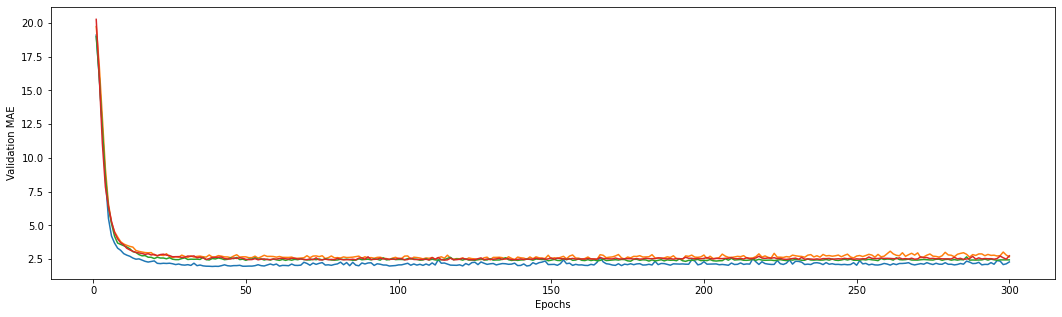

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,5))
for i in range(k):
    plt.plot(range(1,num_epochs+1), all_mae_histories[i])

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Pode ser um pouco difícil ver o gráfico devido à escala e à variação relativamente alta. 

In [12]:
# average_mae_history = [
    # np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

average_mae_history = []

for i in range(num_epochs):
    media = np.mean([all_mae_histories[0][i], all_mae_histories[1][i], 
                     all_mae_histories[2][i], all_mae_histories[3][i]])
    average_mae_history.append(media)

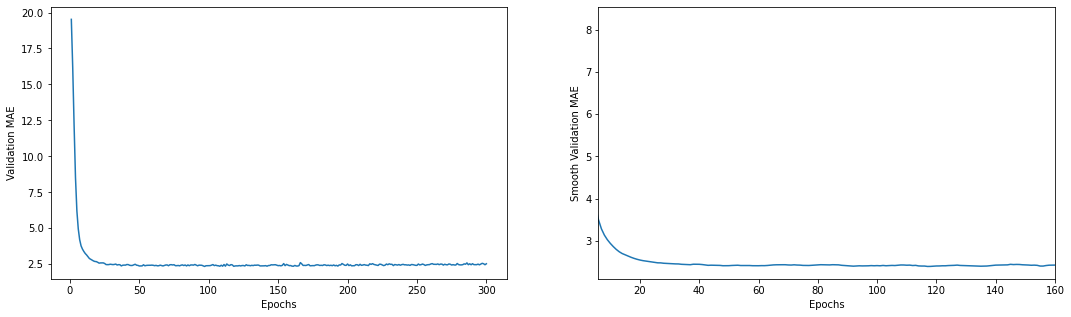

96
291
116


In [13]:
def smooth(curve, N=10):
    return np.convolve(curve, np.ones((N,))/N, mode='valid')

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(range(1, num_epochs + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.subplot(1,2,2)
plt.plot(range(1, len(smooth(average_mae_history)) + 1), smooth(average_mae_history))
plt.xlim([6, 160])
plt.xlabel('Epochs')
plt.ylabel('Smooth Validation MAE')

plt.show()

print(np.argmin(average_mae_history))
print(len(smooth(average_mae_history)))
print(np.argmin(smooth(average_mae_history)))

## Modelo final

Assim que terminarmos de ajustar os parâmetros do nosso modelo (além do número de épocas, também podemos ajustar o tamanho das camadas ocultas), podemos treinar um modelo de "produção" final em todos os dados de treinamento, com os melhores parâmetros:

In [14]:
model2 = build_model()

model2.fit(train_data, train_targets, epochs=65, batch_size = 1, verbose =0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 18.9351 - mae: 2.8433


In [15]:
test_mae_score

2.8432722091674805

## Resumindo

* A regressão é feita usando diferentes funções de perda

* O erro quadrático médio (MSE) é uma função de perda comumente usada para regressão.

* As métricas de avaliação a serem usadas para regressão diferem daquelas usadas para classificação; naturalmente, o conceito de "precisão" não se aplica à regressão. 

* Quando as features têm valores em intervalos diferentes devem ser escaladas de forma independente como uma etapa de pré-processamento.

* Quando há poucos dados disponíveis, usar a validação K-Fold é uma ótima maneira de avaliar um modelo de forma confiável.

* Quando há poucos dados de treinamento disponíveis, é preferível usar uma pequena rede com muito poucas camadas ocultas (normalmente apenas uma ou duas), a fim de evitar overfitting severo.